<a href="https://colab.research.google.com/github/niroshank/asp-dotnet-mvc-l10n-app/blob/master/Section_C_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import required libries
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
iris = load_iris()

In [0]:
# Arrangement of the iris dataset
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

The Iris flower dataset consists of 150 observations, 50 each for setosa, versiocolor and virginica. One observation has 4 attributes in centimeters, sepal lenth, sepal width, petal lenth and petal width.

In [0]:
# Data is a list of array that consists of 4 attributes for a specific features
print((iris.target_names[iris.target[0]]).capitalize(), "has:")
for x in range(3):
  print(iris.data[0][x], iris.feature_names[x])

Setosa has:
5.1 sepal length (cm)
3.5 sepal width (cm)
1.4 petal length (cm)


In [0]:
# Create a dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [0]:
# Add target column to the dataframe
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [0]:
# extracting the associated target names using lambda function
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [0]:
# group the dataframe by target and get the first record
df.groupby(['flower_name']).mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
flower_name,,,,,
setosa,5.006,3.428,1.462,0.246,0
versicolor,5.936,2.770,4.260,1.326,1
virginica,6.588,2.974,5.552,2.026,2


We can identify some variations between the means of flowers. Viriginca's sepal and petal are 19.59cm^2 and 11.25cm^2 larger than other two flowers.

In [0]:
# divide the dataset into 3 sections for a comparative assessment
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

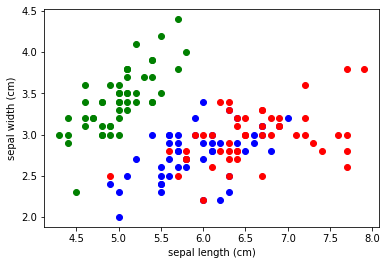

In [0]:
# using sepal length and sepal width we can easily separate 0 and 1
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color="green")
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color="blue")
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color="red")

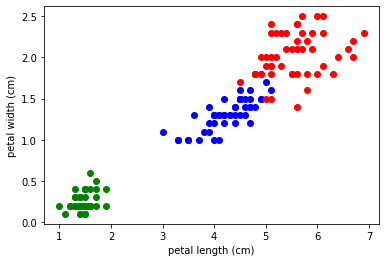

In [0]:
# using SL and SW we can easily separate 0 and 1
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color="green")
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color="blue")
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color="red")

In [0]:
# Create two dataframe to features and targets by dividing the main dataframe
inputs = df.drop(['target', 'flower_name'], axis='columns')
targets = df.target
inputs.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [0]:
targets.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [0]:
# Divide dataset into train and test, 70% for traniing and 30% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3)
print("Number of training features", len(X_train))
print("Number of training targets", len(y_train))
print("Number of testing features", len(X_test))
print("Number of testing targets", len(y_test))

Number of training features 105
Number of training targets 105
Number of testing features 45
Number of testing targets 45


In [0]:
# Create the SVM model
# To idetify the best algorithm for this dataset, plot decision regions are used.

from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
# Since plot decision regions only accepts 2D array, X_train transform to 2 dimensional array
pca = PCA(n_components = 2)
X_train_2D = pca.fit_transform(X_train)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


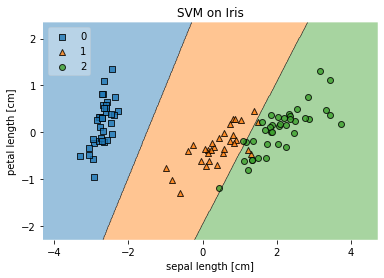

In [0]:
# Linear
from sklearn.svm import SVC
model_ln = SVC(kernel='linear')
model_ln.fit(X_train_2D, y_train)

# ploting
plot_decision_regions(X_train_2D, y_train.to_numpy(), clf=model_ln, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

In [0]:
# Linear
from sklearn.svm import SVC
model_ln = SVC(kernel='rbf')
model_ln.fit(X_train_2D, y_train)

# ploting
plot_decision_regions(X_train_2D, y_train.to_numpy(), clf=model_ln, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

Both Linear and rbf works perfect with iris dataset.

In [0]:
# Identify the ideal C value
for C in [0.1, 0.5, 1.0, 2.0, 4.0]:
  clf_rbf = SVC(kernel='rbf', C=C, gamma='auto')
  clf_ln = SVC(kernel='linear', C=C, gamma='auto')
  clf_rbf.fit(X_train, y_train)
  clf_ln.fit(X_train, y_train)
  scores_rbf = clf_rbf.score(X_test, y_test)
  scores_ln = clf_ln.score(X_test, y_test)
  print("rbf", C, scores_rbf * 100)
  print("ln", C, scores_ln * 100)

rbf 0.1 95.55555555555556
ln 0.1 97.77777777777777
rbf 0.5 97.77777777777777
ln 0.5 100.0
rbf 1.0 97.77777777777777
ln 1.0 97.77777777777777
rbf 2.0 97.77777777777777
ln 2.0 97.77777777777777
rbf 4.0 100.0
ln 4.0 97.77777777777777


In [0]:
# Finalize the model
model = SVC(kernel='rbf', C=0.5, gamma='auto')
model.fit(X_train, y_train)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
model.score(X_test, y_test)

0.9777777777777777

In [0]:
print("Actual value is", iris.target_names[y_test.to_numpy()[0]])
x = model.predict([X_test.to_numpy()[0]])
if x[0] == 0:
  print("Predicted as a setosa")
elif x[0] == 1:
  print("Predicted as a versicolor")
elif x[0] == 2:
  print("Predicted as a virginica")

Actual value is versicolor
Predicted as a versicolor


Text(69.0, 0.5, 'Truth')

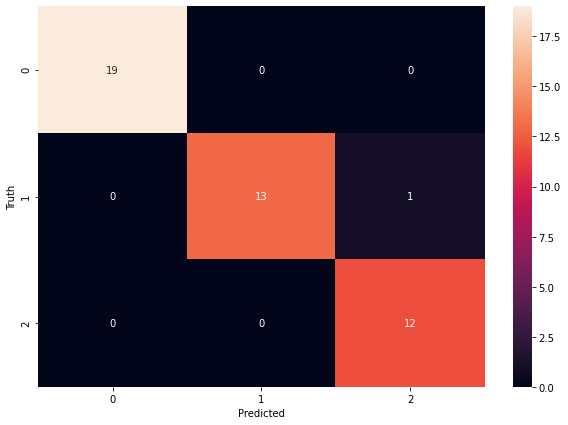

In [0]:
# ploting a confusion matrix
import seaborn as sn # to create a heatmap
from sklearn.metrics import confusion_matrix
y_predicted=model.predict(X_test)
cm=confusion_matrix(y_test,y_predicted)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [0]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0
for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('Accuracy of the multiclass logistic classification is: ', corrPred/(cm.sum()))

Correct predictions:  44
False predictions 1
Accuracy of the multiclass logistic classification is:  0.9777777777777777
